In [188]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import RandomOverSampler
from sklearn.metrics import classification_report
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_curve, auc
from mlxtend.feature_selection import SequentialFeatureSelector
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import recall_score

In [189]:
data = 'https://raw.githubusercontent.com/briancabral95/Datasets/main/CAD.csv'
df = pd.read_csv(data)

In [190]:
df.head()

,Age,Weight,Length,Sex,BMI,DM,HTN,Current Smoker,EX-Smoker,FH,...,K,Na,WBC,Lymph,Neut,PLT,EF-TTE,Region RWMA,VHD,Cath
0,53,90,175,Male,29.387755,0,1,1,0,0,...,4.7,141,5700,39,52,261,50,0,N,Cad
1,67,70,157,Fmale,28.398718,0,1,0,0,0,...,4.7,156,7700,38,55,165,40,4,N,Cad
2,54,54,164,Male,20.077335,0,0,1,0,0,...,4.7,139,7400,38,60,230,40,2,mild,Cad
3,66,67,158,Fmale,26.838648,0,1,0,0,0,...,4.4,142,13000,18,72,742,55,0,Severe,Normal
4,50,87,153,Fmale,37.165193,0,1,0,0,0,...,4.0,140,9200,55,39,274,50,0,Severe,Normal


In [191]:
print('\nFilas, Columnas:\n', df.shape)

print('\nColumnas:\n', df.columns)

print('\nTipo de datos:\n', df.dtypes)

print('\nDatos Nulos:\n', df.isnull().sum())

print('\nValores duplicados:\n', df.duplicated().sum())


Filas, Columnas:
 (303, 55)

Columnas:
 Index(['Age', 'Weight', 'Length', 'Sex', 'BMI', 'DM', 'HTN', 'Current Smoker',
       'EX-Smoker', 'FH', 'Obesity', 'CRF', 'CVA', 'Airway disease',
       'Thyroid Disease', 'CHF', 'DLP', 'BP', 'PR', 'Edema',
       'Weak Peripheral Pulse', 'Lung rales', 'Systolic Murmur',
       'Diastolic Murmur', 'Typical Chest Pain', 'Dyspnea', 'Function Class',
       'Atypical', 'Nonanginal', 'Exertional CP', 'LowTH Ang', 'Q Wave',
       'St Elevation', 'St Depression', 'Tinversion', 'LVH',
       'Poor R Progression', 'FBS', 'CR', 'TG', 'LDL', 'HDL', 'BUN', 'ESR',
       'HB', 'K', 'Na', 'WBC', 'Lymph', 'Neut', 'PLT', 'EF-TTE', 'Region RWMA',
       'VHD', 'Cath'],
      dtype='object')

Tipo de datos:
 Age                        int64
Weight                     int64
Length                     int64
Sex                       object
BMI                      float64
DM                         int64
HTN                        int64
Current Smoker          

In [192]:
df.describe()

,Age,Weight,Length,BMI,DM,HTN,Current Smoker,EX-Smoker,FH,BP,...,ESR,HB,K,Na,WBC,Lymph,Neut,PLT,EF-TTE,Region RWMA
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,...,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,58.897690,73.831683,164.716172,27.248339,0.297030,0.590759,0.207921,0.033003,0.158416,129.554455,...,19.462046,13.153465,4.230693,140.996700,7562.046205,32.399340,60.148515,221.488449,47.231023,0.620462
std,10.392278,11.987358,9.327661,4.098865,0.457706,0.492507,0.406491,0.178941,0.365734,18.938105,...,15.936475,1.610452,0.458202,3.807885,2413.739323,9.972592,10.182493,60.796199,8.927194,1.132531
min,30.000000,48.000000,140.000000,18.115413,0.000000,0.000000,0.000000,0.000000,0.000000,90.000000,...,1.000000,8.900000,3.000000,128.000000,3700.000000,7.000000,32.000000,25.000000,15.000000,0.000000
25%,51.000000,65.000000,158.000000,24.514380,0.000000,0.000000,0.000000,0.000000,0.000000,120.000000,...,9.000000,12.200000,3.900000,139.000000,5800.000000,26.000000,52.500000,183.500000,45.000000,0.000000
50%,58.000000,74.000000,165.000000,26.775510,0.000000,1.000000,0.000000,0.000000,0.000000,130.000000,...,15.000000,13.200000,4.200000,141.000000,7100.000000,32.000000,60.000000,210.000000,50.000000,0.000000
75%,66.000000,81.000000,171.000000,29.411765,1.000000,1.000000,0.000000,0.000000,0.000000,140.000000,...,26.000000,14.200000,4.500000,143.000000,8800.000000,39.000000,67.000000,250.000000,55.000000,1.000000
max,86.000000,120.000000,188.000000,40.900658,1.000000,1.000000,1.000000,1.000000,1.000000,190.000000,...,90.000000,17.600000,6.600000,156.000000,18000.000000,60.000000,89.000000,742.000000,60.000000,4.000000


In [193]:
# Numerical variables:
num_var = df[['Age','Weight', 'Length','BMI', 'BP', 'PR', 'FBS', 'CR', 'TG', 'LDL', 'HDL', 'BUN', 'ESR', 'HB', 'K', 'Na', 'WBC',
            'Lymph', 'Neut', 'PLT', 'EF-TTE']]

# Categorical variables:
cat_var = df[['Sex', 'DM', 'HTN', 'Function Class', 'Region RWMA', 'Current Smoker', 'EX-Smoker', 'FH', 'Obesity', 'CRF', 'CVA', 'Airway disease', 'Thyroid Disease',
            'CHF', 'DLP', 'Edema', 'Weak Peripheral Pulse', 'Lung rales', 'Systolic Murmur', 'Diastolic Murmur', 'Typical Chest Pain',
            'Dyspnea', 'Atypical', 'Nonanginal', 'Exertional CP', 'LowTH Ang', 'Q Wave', 'St Elevation', 'St Depression', 'Tinversion',
            'LVH', 'Poor R Progression', 'VHD', 'Cath']]

In [194]:
# Codificación de variables categóricas

cath = {"Normal": 0, "Cad": 1}
vhd = {"N": 0, "mild": 1, "Moderate": 2, "Severe": 3}
sex = {"Male": 1, "Fmale": 0}

df['Cath'] = df['Cath'].map(cath)
df['VHD'] = df['VHD'].map(vhd)
df['Sex'] = df['Sex'].map(sex)

df.replace('N', 0, inplace=True)
df.replace('Y', 1, inplace=True)

In [195]:
CAD_Yes = df[df['Cath']==1]
CAD_No = df[df['Cath']==0]

In [196]:
plt.style.use('ggplot')

# EDA

## ¿Cómo se distribuyen las variables numericas?

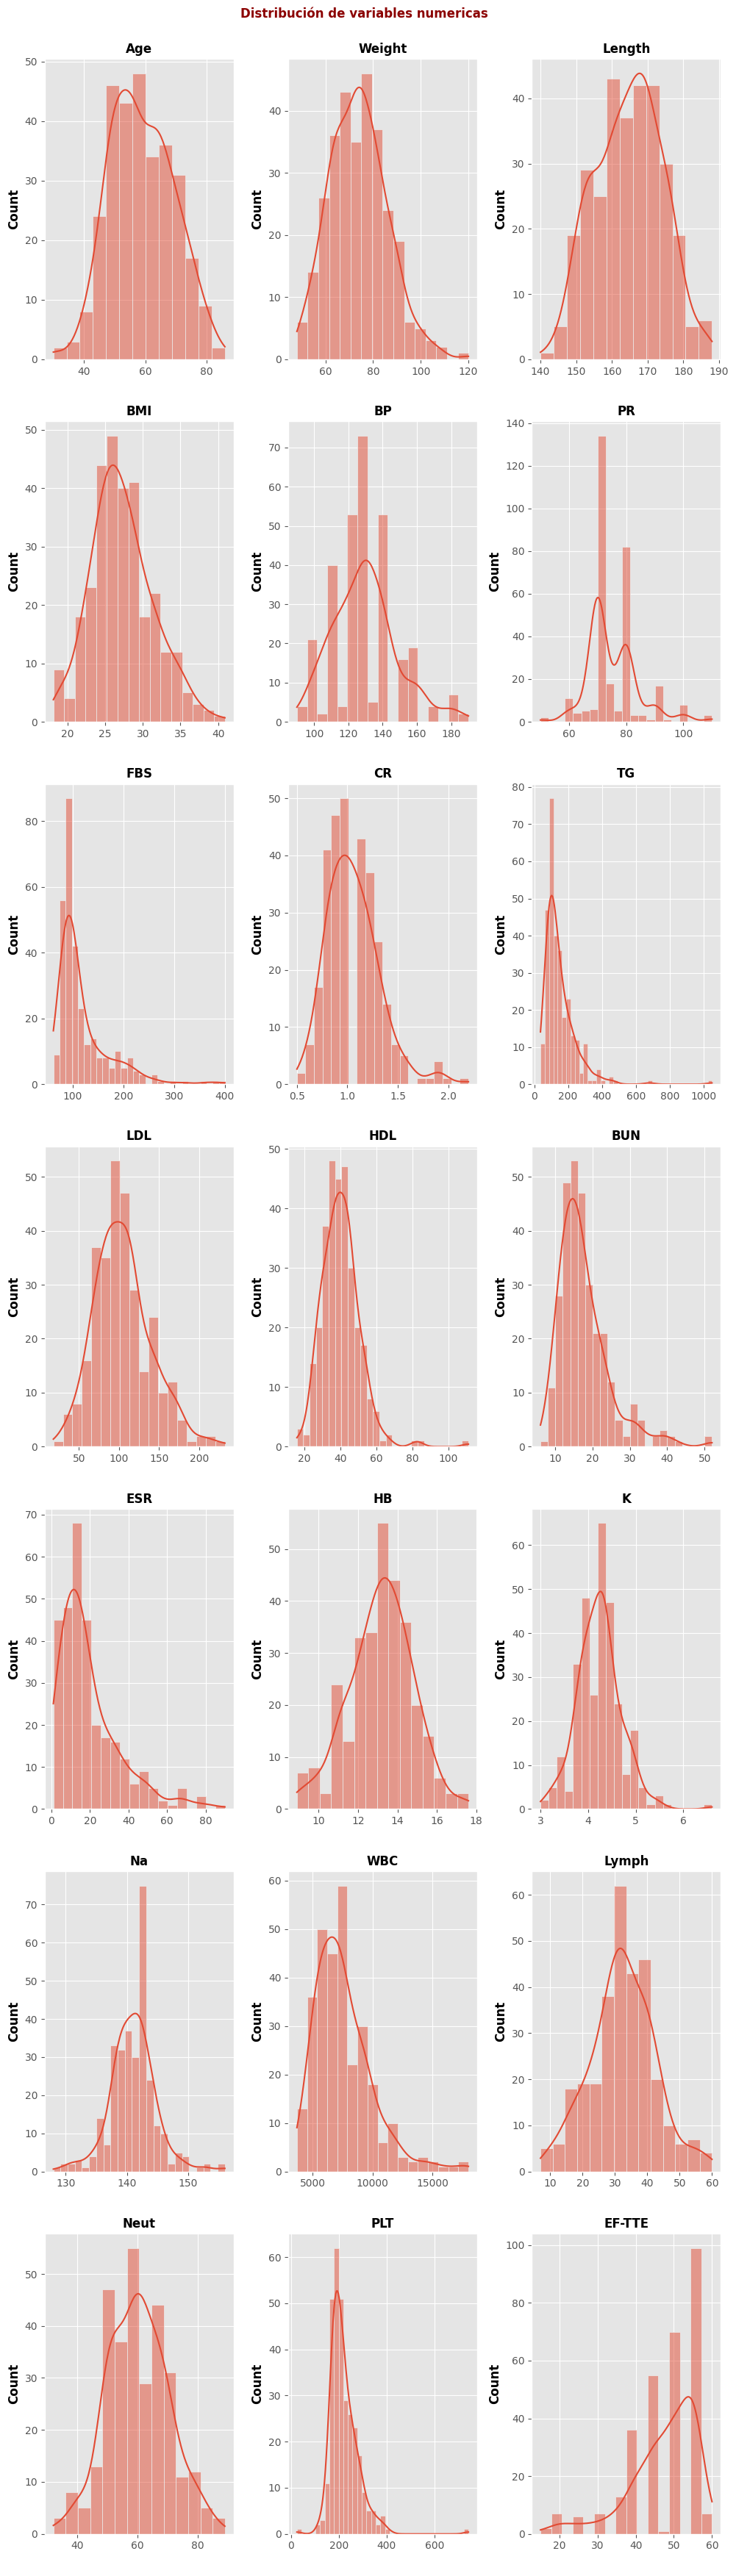

In [197]:
num_plots = len(num_var.columns)
columns = num_var.columns

fig, axs = plt.subplots(7, 3, figsize=(10,35))
axs = axs.flat

for i, column in enumerate(columns):
  sns.histplot(df, x=column, stat='count', ax=axs[i], kde=True, alpha=0.5)
  axs[i].set_xlabel(" ")
  axs[i].set_ylabel("Count", fontsize = 12, fontweight = 'bold', color = 'black')
  axs[i].set_title(column, fontsize = 12, fontweight = 'bold', color = 'black')

fig.suptitle('Distribución de variables numericas', fontsize = 12, fontweight = 'bold', color = 'darkred', y = 1)
fig.subplots_adjust(top=0.9)
fig.tight_layout()
fig.show()




## ¿Cuál es la relación entre el sexo y la presencia de arteriopatía coronaria?

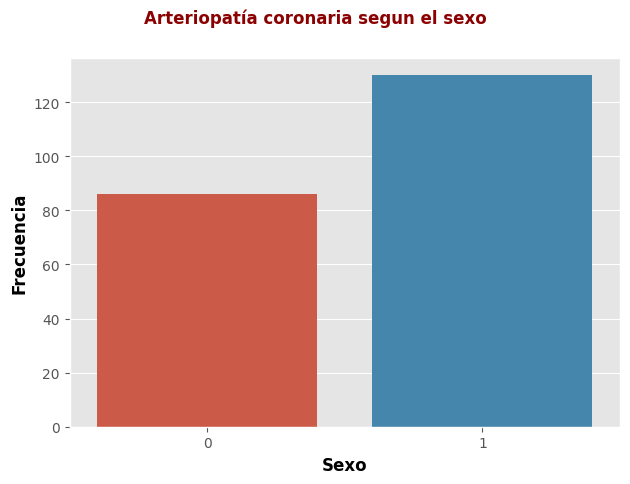

In [198]:
fig, ax = plt.subplots()
sns.countplot(data=CAD_Yes, x='Sex')

ax.set_xlabel("Sexo", fontsize = 12, fontweight = 'bold', color = 'black')
ax.set_ylabel("Frecuencia", fontsize = 12, fontweight = 'bold', color = 'black')


fig.suptitle('Arteriopatía coronaria segun el sexo', fontsize = 12, fontweight = 'bold', color = 'darkred', y = 1)
fig.subplots_adjust(top=0.9)
fig.tight_layout()
fig.show()

## ¿Qué factores como la edad, el peso y el índice de masa corporal (BMI), están asociados con un mayor riesgo de arteriopatía coronaria?

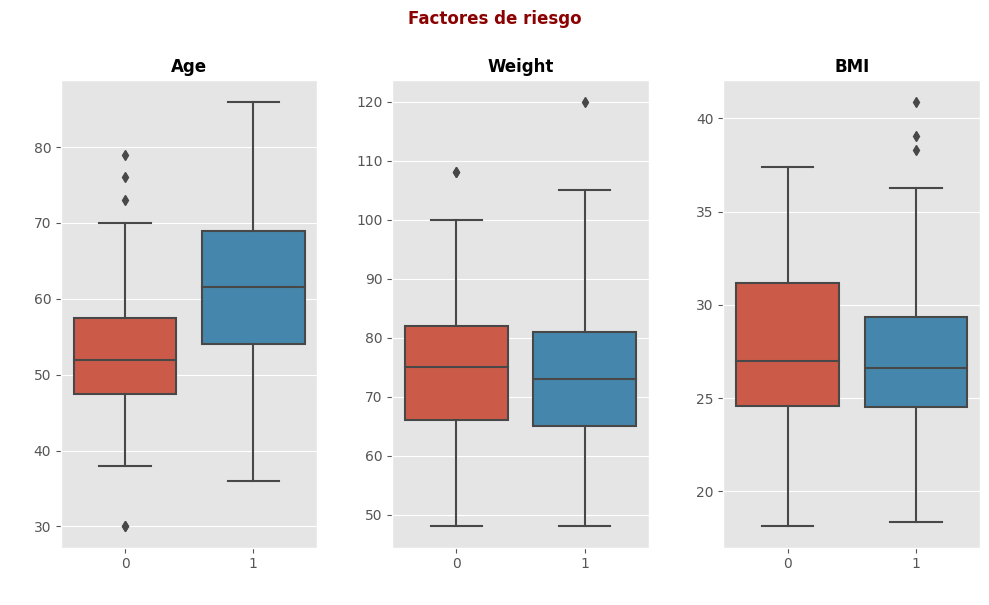

In [199]:
columns = df[['Age', 'Weight', 'BMI']]

fig, axs = plt.subplots(1, 3, figsize=(10,6))
axs = axs.flat

for i, column in enumerate(columns):
  sns.boxplot(df, x = 'Cath',y=column, ax=axs[i])
  axs[i].set_xlabel(" ")
  axs[i].set_ylabel(" ")
  axs[i].set_title(column, fontsize = 12, fontweight = 'bold', color = 'black')


fig.suptitle('Factores de riesgo', fontsize = 12, fontweight = 'bold', color = 'darkred', y = 1)
fig.subplots_adjust(top=0.9)
fig.tight_layout()
fig.show()

## ¿Cuál es la prevalencia de factores de riesgo como la diabetes, la hipertensión, el tabaquismo y la dislipidemia entre los pacientes con arteriopatía coronaria?

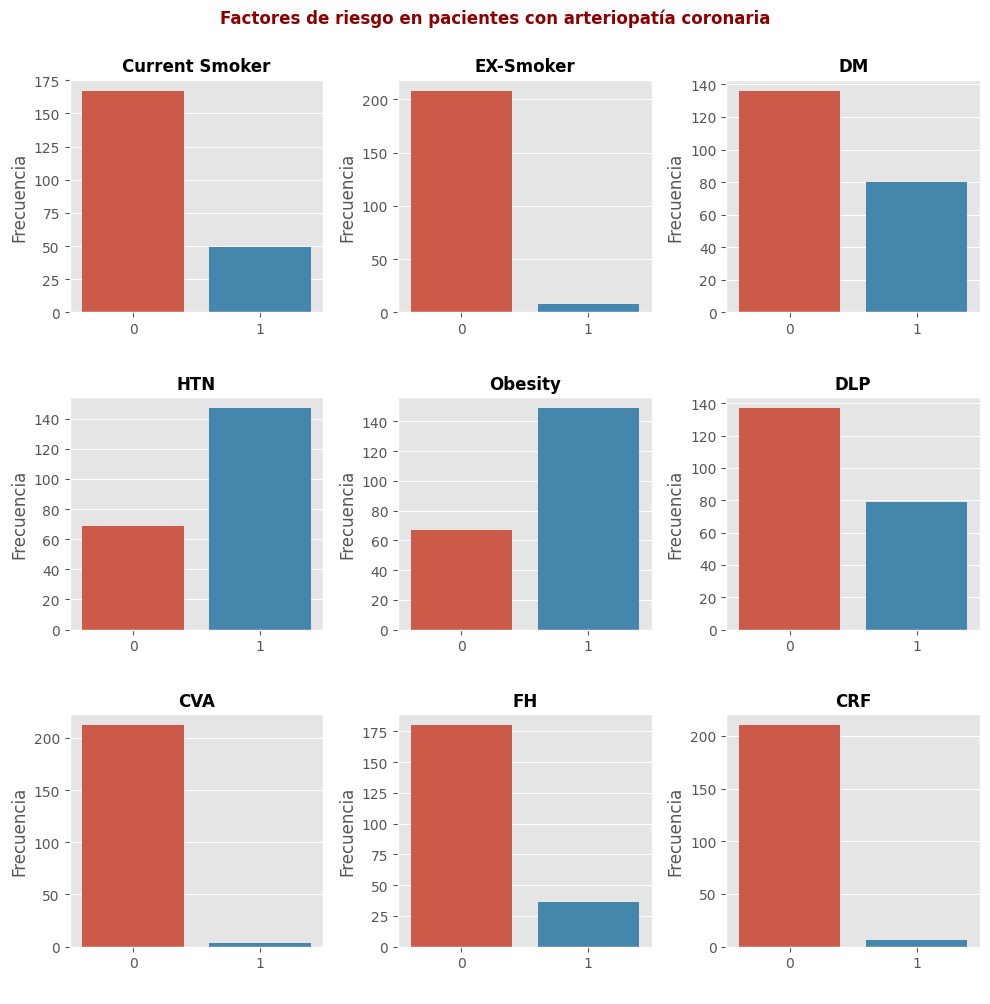

In [200]:
columns = CAD_Yes[['Current Smoker', 'EX-Smoker', 'DM', 'HTN', 'Obesity', 'DLP', 'CVA', 'FH', 'CRF']]

fig, axs = plt.subplots(3, 3, figsize=(10,10))
axs = axs.flat

for i, column in enumerate(columns):
  sns.countplot(CAD_Yes, x = column, ax=axs[i])
  axs[i].set_xlabel(" ")
  axs[i].set_ylabel("Frecuencia")
  axs[i].set_title(column, fontsize = 12, fontweight = 'bold', color = 'black')


fig.suptitle('Factores de riesgo en pacientes con arteriopatía coronaria', fontsize = 12, fontweight = 'bold', color = 'darkred', y = 1)
fig.subplots_adjust(top=0.9)
fig.tight_layout()
fig.show()

## ¿Cuáles son los síntomas y las características de la enfermedad más comunes en los pacientes con arteriopatía coronaria?

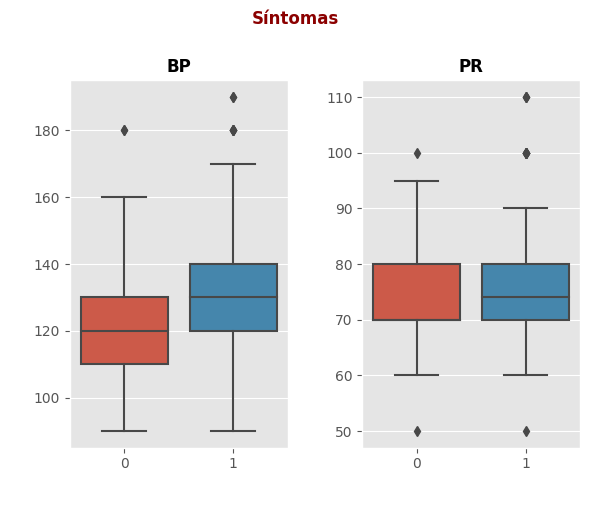

In [201]:
columns = df[['BP', 'PR']]

fig, axs = plt.subplots(1, 2, figsize=(6,5))
axs = axs.flat

for i, column in enumerate(columns):
  sns.boxplot(df, x='Cath', y = column, ax=axs[i])
  axs[i].set_xlabel(" ")
  axs[i].set_ylabel(" ")
  axs[i].set_title(column, fontsize = 12, fontweight = 'bold', color = 'black')


fig.suptitle('Síntomas', fontsize = 12, fontweight = 'bold', color = 'darkred', y = 1)
fig.subplots_adjust(top=0.9)
fig.tight_layout()
fig.show()

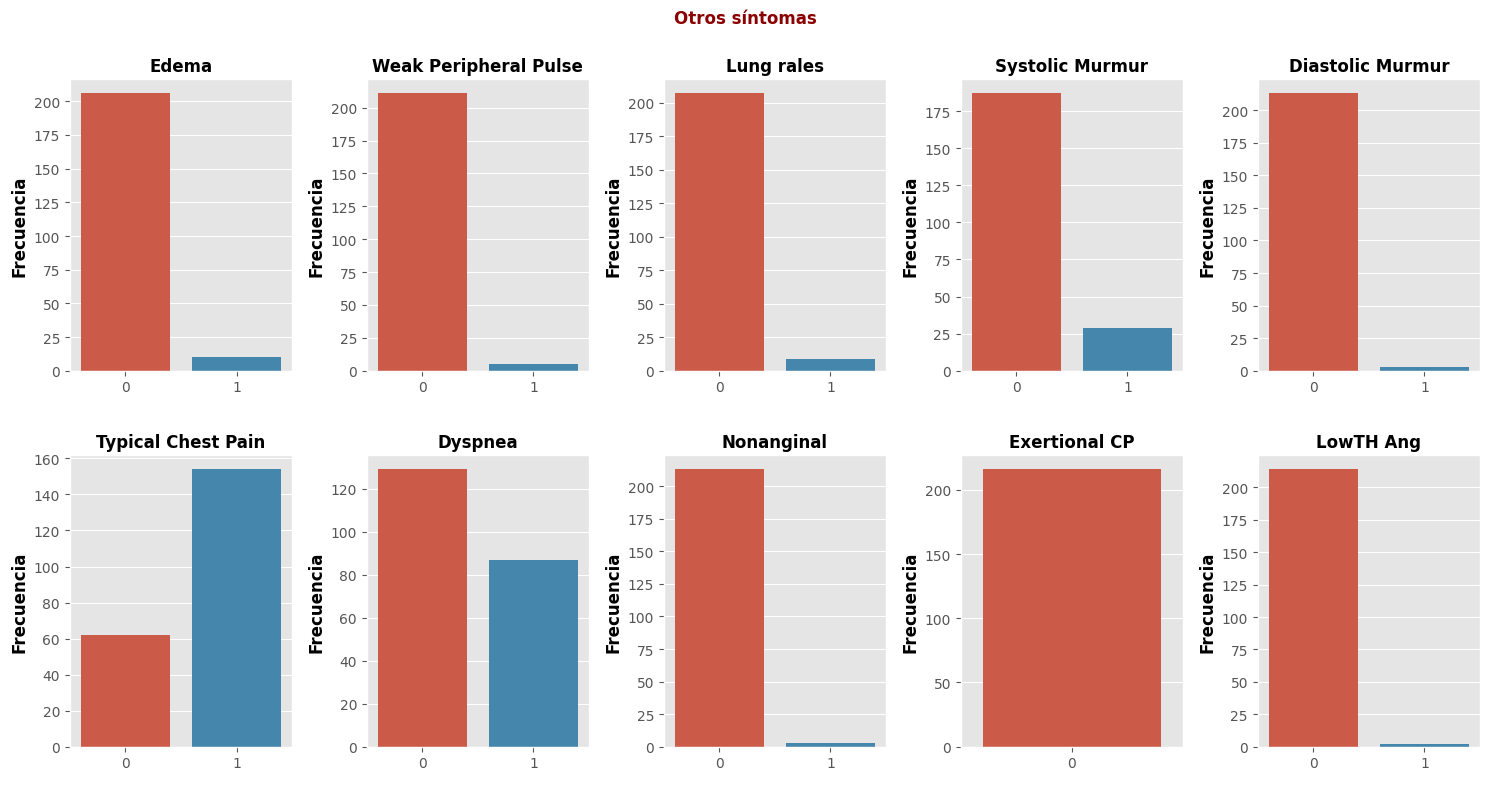

In [202]:
columns = CAD_Yes[['Edema', 'Weak Peripheral Pulse', 'Lung rales', 'Systolic Murmur', 'Diastolic Murmur', 'Typical Chest Pain', 'Dyspnea', 'Nonanginal', 'Exertional CP', 'LowTH Ang']]

fig, axs = plt.subplots(2, 5, figsize=(15,8))
axs = axs.flat

for i, column in enumerate(columns):
  sns.countplot(CAD_Yes, x = column, ax=axs[i])
  axs[i].set_xlabel(" ")
  axs[i].set_ylabel("Frecuencia", fontsize = 12, fontweight = 'bold', color = 'black')
  axs[i].set_title(column, fontsize = 12, fontweight = 'bold', color = 'black')


fig.suptitle('Otros síntomas', fontsize = 12, fontweight = 'bold', color = 'darkred', y = 1)
fig.subplots_adjust(top=0.9)
fig.tight_layout()
fig.show()

## ¿Existen patrones en los valores de laboratorio, como el nivel de glucosa en sangre, creatinina, lípidos y otros, que estén relacionados con la arteriopatía coronaria?

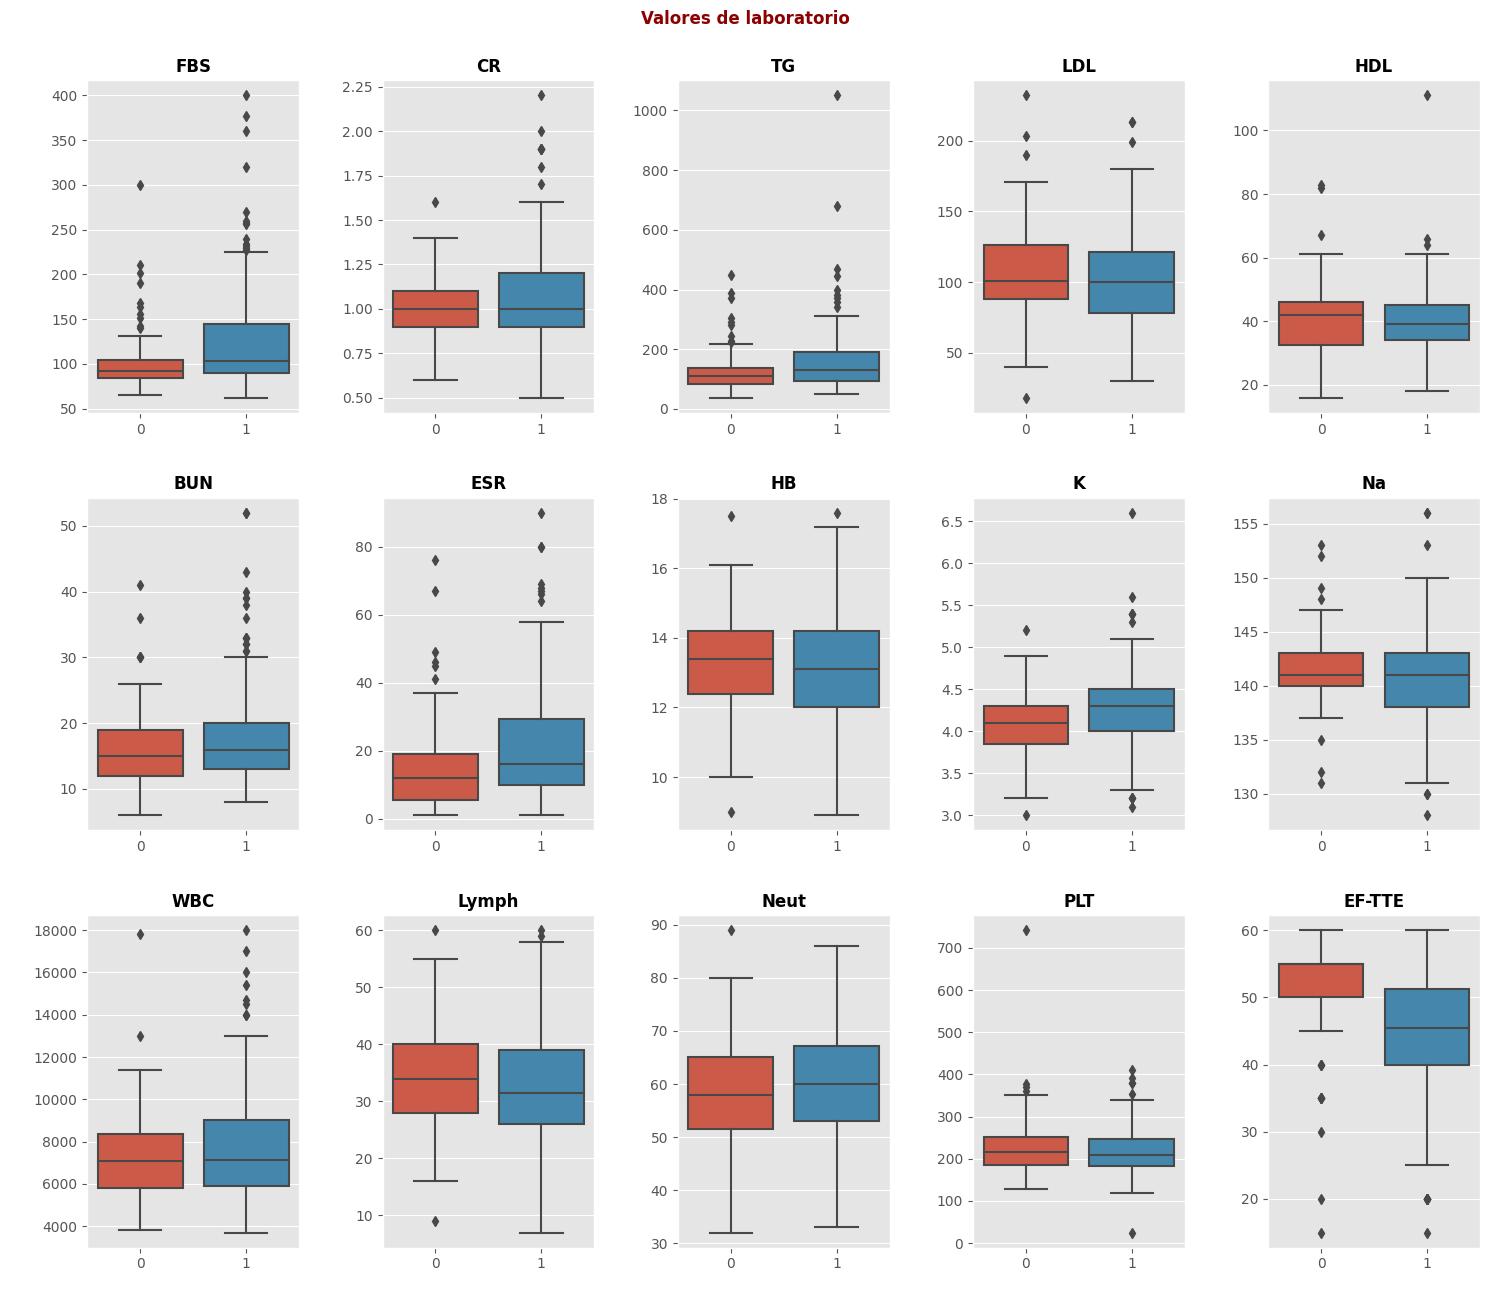

In [203]:
columns = df[['FBS', 'CR', 'TG', 'LDL', 'HDL', 'BUN', 'ESR', 'HB', 'K', 'Na', 'WBC', 'Lymph', 'Neut', 'PLT', 'EF-TTE']]

fig, axs = plt.subplots(3, 5, figsize=(15, 13))
axs = axs.flat

for i, column in enumerate(columns):
  sns.boxplot(df,x = 'Cath', y = column, ax=axs[i])
  axs[i].set_xlabel(" ")
  axs[i].set_ylabel(" ")
  axs[i].set_title(column, fontsize = 12, fontweight = 'bold', color = 'black')


fig.suptitle('Valores de laboratorio', fontsize = 12, fontweight = 'bold', color = 'darkred', y = 1)
fig.subplots_adjust(top=0.9)
fig.tight_layout()
fig.show()

## ¿Cómo afecta la enfermedad valvular a la arteriopatía coronaria, si es que lo hace?

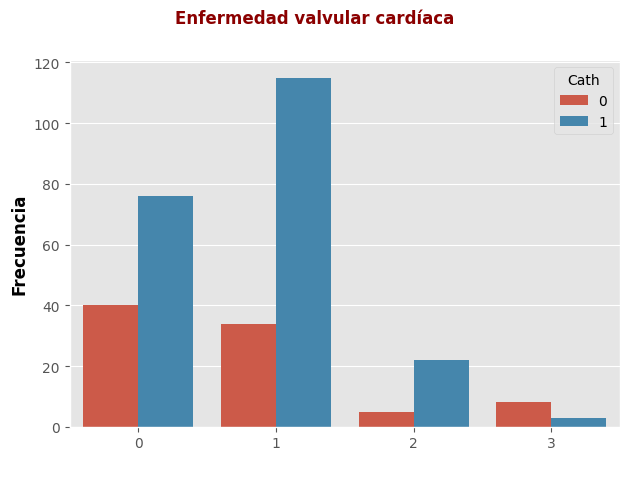

In [204]:
fig, ax = plt.subplots()
sns.countplot(data=df, x='VHD', hue='Cath')

ax.set_xlabel(" ", fontsize = 12, fontweight = 'bold', color = 'black')
ax.set_ylabel("Frecuencia", fontsize = 12, fontweight = 'bold', color = 'black')


fig.suptitle('Enfermedad valvular cardíaca', fontsize = 12, fontweight = 'bold', color = 'darkred', y = 1)
fig.subplots_adjust(top=0.9)
fig.tight_layout()
fig.show()

#Entrenamiento y testeo

In [205]:
# Separa las caracteristicas de la variable a predecir
X = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [206]:
# Inicializa el selector para que elija las mejores 'k' características utilizando chi-cuadrado
selector = SelectKBest(chi2, k=10)

# Ajuste del selector a los datos
X = selector.fit_transform(X, y)

# Obtén las características seleccionadas
selected_features = selector.get_support(indices=True)

# Visualiza las características seleccionadas
selected_feature_names = [df.columns[i] for i in selected_features]
print("Características seleccionadas:", selected_feature_names)

Características seleccionadas: ['Age', 'BP', 'Typical Chest Pain', 'Atypical', 'FBS', 'TG', 'ESR', 'WBC', 'PLT', 'Region RWMA']


In [207]:
# Balanceo de clases minoritarias del dataset
sm = RandomOverSampler()
X,y = sm.fit_resample(X,y)

In [208]:
# División de los datos en conjuntos de prueba y testeo
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)

In [209]:
# Estandarizado de los datos
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Modelo 1: Random Forest Classifier

In [210]:
from sklearn.ensemble import RandomForestClassifier

# Creación de modelo
RFC = RandomForestClassifier()

In [211]:
# Definir la cuadrícula de hiperparámetros para la búsqueda aleatoria
param_dist = {
    'n_estimators': [50, 100, 150, 200],
    'max_depth': [5, 10, 15, 20],
    'min_samples_split': [2, 5, 10, 15],
    'min_samples_leaf': [1, 2, 4, 8],
    'max_features': [4, 6, 8, 10]
}

# Inicializar RandomizedSearchCV
random_search = RandomizedSearchCV(RFC, param_distributions=param_dist, n_jobs=-1, cv=10, scoring='recall')

# Realizar la búsqueda aleatoria en los datos de entrenamiento
random_search.fit(X_train, y_train)

# Obtener el modelo con los mejores hiperparámetros
best_RFC = random_search.best_estimator_

# Imprimir modelo con los mejores hiperparametros
print("Mejores hiperparametros:", random_search.best_params_)

Mejores hiperparametros: {'n_estimators': 150, 'min_samples_split': 15, 'min_samples_leaf': 1, 'max_features': 4, 'max_depth': 15}


In [212]:
# Entrena el modelo con los mejores hiperparametros
RFC = best_RFC
RFC.fit(X_train, y_train)
y_pred = RFC.predict(X_test)

In [213]:
# Evaluación de precisión del modelo
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.87      0.95      0.91        65
           1       0.95      0.86      0.90        65

    accuracy                           0.91       130
   macro avg       0.91      0.91      0.91       130
weighted avg       0.91      0.91      0.91       130



In [214]:
# Matriz de confusión
print(confusion_matrix(y_test, y_pred))

[[62  3]
 [ 9 56]]


In [215]:
# Calcula la tasa de falsos positivos (FPR) y la tasa de verdaderos positivos (TPR) utilizando la función roc_curve
fpr, tpr, _ = roc_curve(y_test, y_pred)

# Calcula el área bajo la curva ROC (AUC) utilizando la función auc
roc_auc = auc(fpr, tpr)

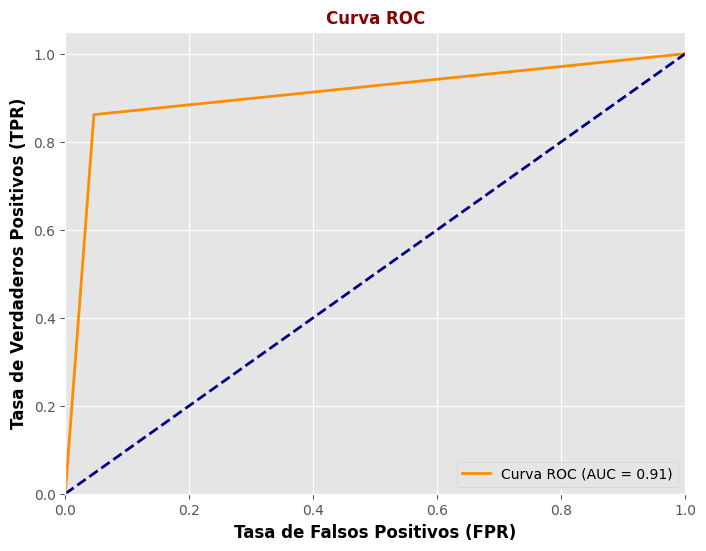

In [216]:
# Graficar la Curva ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'Curva ROC (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de Falsos Positivos (FPR)', fontsize = 12, fontweight = 'bold', color = 'black')
plt.ylabel('Tasa de Verdaderos Positivos (TPR)', fontsize = 12, fontweight = 'bold', color = 'black')
plt.title('Curva ROC', fontsize = 12, fontweight = 'bold', color = 'darkred', y = 1)
plt.legend(loc='lower right')
plt.show()

# Modelo 2: K-Neighbors Classifier

In [217]:
from sklearn.neighbors import KNeighborsClassifier

# Creacion del modelo
KNN = KNeighborsClassifier()

In [218]:
# Definir los hiperparámetros que deseas ajustar
param_grid = {
    'n_neighbors': [2, 3, 4, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50],
    'weights': ['uniform', 'distance'],
    'p': [1, 2]
}

# Crear un objeto GridSearchCV con KNN y los hiperparámetros definidos
grid_search = GridSearchCV(KNN, param_grid, cv=10, scoring='recall')
grid_search.fit(X_train, y_train)

# Obtener el modelo con los mejores hiperparámetros
best_KNN = grid_search.best_estimator_

# Imprimir modelo con los mejores hiperparámetros
print("Mejores hiperparametros:", grid_search.best_params_)

Mejores hiperparametros: {'n_neighbors': 2, 'p': 2, 'weights': 'distance'}


In [219]:
# Entrena el modelo con los mejores hiperparametros
KNN = best_KNN
KNN.fit(X_train, y_train)
y_pred = KNN.predict(X_test)

In [220]:
# Evaluación de precisión del modelo
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.91      0.95      0.93        65
           1       0.95      0.91      0.93        65

    accuracy                           0.93       130
   macro avg       0.93      0.93      0.93       130
weighted avg       0.93      0.93      0.93       130



In [221]:
# Matriz de confusión
matrix = confusion_matrix(y_test, y_pred)
print(matrix)

[[62  3]
 [ 6 59]]


In [222]:
# Calcula la tasa de falsos positivos (FPR) y la tasa de verdaderos positivos (TPR) utilizando la función roc_curve
fpr, tpr, _ = roc_curve(y_test, y_pred)

# Calcula el área bajo la curva ROC (AUC) utilizando la función auc
roc_auc = auc(fpr, tpr)

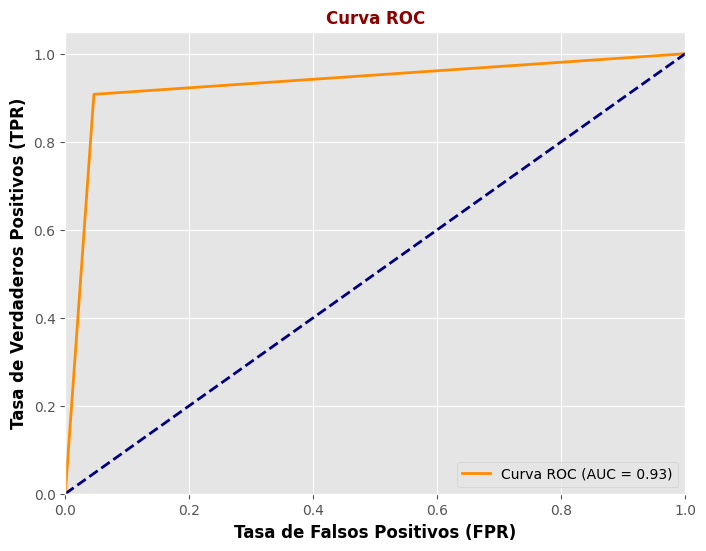

In [223]:
# Graficar la Curva ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'Curva ROC (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de Falsos Positivos (FPR)', fontsize = 12, fontweight = 'bold', color = 'black')
plt.ylabel('Tasa de Verdaderos Positivos (TPR)', fontsize = 12, fontweight = 'bold', color = 'black')
plt.title('Curva ROC', fontsize = 12, fontweight = 'bold', color = 'darkred', y = 1)
plt.legend(loc='lower right')
plt.show()

# Validacion cruzada

In [224]:
# Crea una lista para almacenar los modelos que se van a evaluar
models = []
models.append(('RFC', best_RFC))  # Agrega el mejor modelo de RandomForestClassifier al conjunto
models.append(('KNN', best_KNN))  # Agrega el mejor modelo de KNeighborsClassifier al conjunto

# Inicializar un diccionario para almacenar los resultados
results = dict()

# Iteración de los modelos y realizar validación cruzada
for name, model in models:
  kfold = KFold(n_splits=10)
  cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring='recall')
  cv_results1 = cross_val_score(model, X_train, y_train, cv=kfold, scoring='accuracy')
  results[name]=(cv_results.mean(), cv_results.std(), cv_results1.mean(), cv_results1.std())

# Imprime los resultados
print("name   recall.mean          recall.std          accuracy.mean          accuracy.std")
for key, value in results.items():
    print(key, value)

name   recall.mean          recall.std          accuracy.mean          accuracy.std
RFC (0.8371982841719683, 0.09075618619873445, 0.8704301075268818, 0.06091613753540701)
KNN (0.7960097358781569, 0.08936647165795379, 0.8807526881720431, 0.053934030437791804)
